     indice_tiempo medio_de_transporte      pais_destino  turistas_residentes
0          2016-01               Aérea           Bolivia               4206.6
1          2016-01               Aérea            Brasil             105255.5
2          2016-01               Aérea             Chile              27596.7
3          2016-01               Aérea          Paraguay               3097.2
4          2016-01               Aérea           Uruguay              15872.2
...            ...                 ...               ...                  ...
1696       2021-03    Fluvial/Marítima           Uruguay               4556.0
1697       2021-03    Fluvial/Marítima   EE.UU. y Canadá                  0.0
1698       2021-03    Fluvial/Marítima  Resto de América                  0.0
1699       2021-03    Fluvial/Marítima            Europa                  0.0
1700       2021-03    Fluvial/Marítima   Resto del mundo                  0.0

[1701 rows x 4 columns]


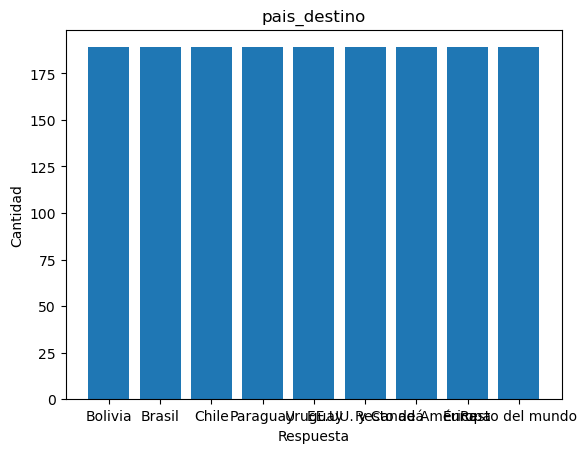

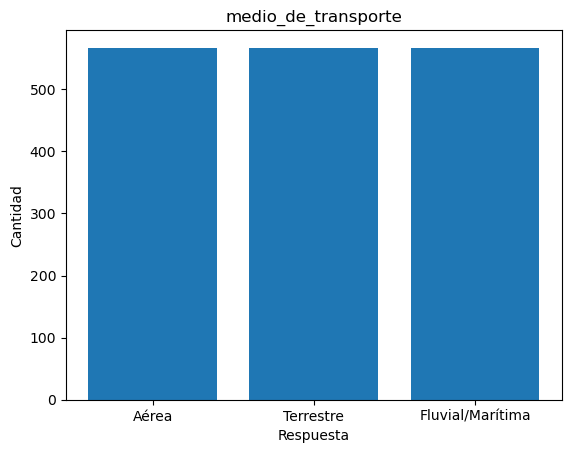

In [12]:
import pandas as pd

import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import numpy as np

df=pd.read_csv("turistas-residentes-serie.csv")

df.dropna();
df.drop_duplicates()

print(df)

x=df["pais_destino"].unique()
y=df["pais_destino"].value_counts().tolist()

y.reverse()

plt1.bar(x,y)
plt1.title("pais_destino")
plt1.xlabel("Respuesta")
plt1.ylabel("Cantidad")
plt1.show()

x=df["medio_de_transporte"].unique()
y=df["medio_de_transporte"].value_counts().tolist()
y.reverse()

plt1.bar(x,y)
plt1.title("medio_de_transporte")
plt1.xlabel("Respuesta")
plt1.ylabel("Cantidad")
plt1.show()

Bolivia=df.loc[df['pais_destino'] == 'Bolivia']
Brasil=df.loc[df['pais_destino'] == 'Brasil']
Chile=df.loc[df['pais_destino'] == 'Telefe']
Paraguay=df.loc[df['pais_destino'] == 'Paraguay']
Uruguay=df.loc[df['pais_destino'] == 'Uruguay']
EEUU_Canada=df.loc[df['pais_destino'] == 'EE.UU. y Canadá']
Resto_de_America=df.loc[df['pais_destino'] == 'Resto de América']
Europa=df.loc[df['pais_destino'] == 'Europa']
Resto_del_mundo=df.loc[df['pais_destino'] == 'Resto del mundo']

boliviaCount = Bolivia['turistas_residentes'].unique()
Resto_del_mundoCount = Resto_del_mundo['turistas_residentes'].unique()
EuropaCount = Europa['turistas_residentes'].unique()
Resto_de_AmericaCount = Resto_de_America['turistas_residentes'].unique()
EEUU_CanadaCount = EEUU_Canada['turistas_residentes'].unique()
UruguayCount = Uruguay['turistas_residentes'].unique()
ParaguayCount = Paraguay['turistas_residentes'].unique()
ChileCount = Chile['turistas_residentes'].unique()
BrasilCount = Brasil['turistas_residentes'].unique()